In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(suppress=True)

In [2]:
# first let's create the start state 
state = np.zeros((7))
state[3] = 1
state

seq = state
seq

loc = np.argwhere(state)
loc = loc[0][0]
loc

sequence_array = []

In [15]:
all_array = []

for j in range(100):
    sequence_array = []
    i = 0
    while i < 10:
        state = np.zeros((7), dtype=np.int)
        state[3] = 1
        seq = state
        loc = np.argwhere(state)[0][0]

        while loc != 0 and loc != state.shape[0] - 1:
            if np.random.rand() <= 0.5:
                loc += -1
            else:
                loc += 1
            state = np.zeros(7)
            state[loc] = 1
            seq = np.vstack((seq, state))
        
        
        sequence_array.append(seq)
        i += 1
    all_array.append(sequence_array)
print all_array[0]


[array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]]), array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.]]), array([[0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0

In [16]:
def rmse(predictions, targets):
    return np.sqrt(np.mean((predictions-targets)**2))

In [17]:
Z = np.array([0., 1./6, 1./3, 1./2, 2./3, 5./6, 1])
lambdas = [0., 0.3, 0.8, 1.]
rms_lambdas = np.zeros((4,14))
index = -1
for lam in lambdas:
    index += 1
    rmses = []  
    for mm in np.linspace(0,0.6,14):
        
        alpha = mm
        ten_seq = all_array[1]
        last_ans = np.zeros((100, 5))
        
        # start of a training set
        for ten in range(100):
            w_0 = np.array([0, 0.5, 0.5, 0.5, 0.5, 0.5, 1])
            ten_seq = all_array[ten] 

            ten_sum = np.zeros(7)
            
            # start of a sequence
            for i in range(len(ten_seq)):
                seq = ten_seq[i]
                sum_delta_w = np.zeros(7)
                
                # start of each obs
                for t in range(len(seq)-1):
                    # calculate first part 
                    P0 = np.dot(w_0, seq[t])
                    P1 = np.dot(w_0, seq[t+1])
                    first = alpha * (P1 - P0)
                    
                    req_mat = np.array(seq[:t+1, :])
                    k_t_sum = np.zeros(7)

                    # delta W
                    for k in range(t+1):
                        up = t - k
                        lambed = lam ** up
                        req_mat[k] = req_mat[k] * lambed
                    k_t_sum = np.sum(req_mat, axis=0)
                    delta_w = first * k_t_sum

                    sum_delta_w = sum_delta_w + delta_w
                    
                w_0[1:-1] = w_0[1:-1] + sum_delta_w[1:-1]        

            ### A sequence ends over here

            last_ans[ten, :] = w_0[1:-1]
        rmsed = rmse(last_ans, Z[1:-1])
        rmses.append(rmsed)
        print lam, alpha, rmsed
    rms_lambdas[index, :] = np.array(rmses) 
    

0.0 0.0 0.23570226039551587
0.0 0.04615384615384615 0.1787740727945165
0.0 0.0923076923076923 0.13584058415398684
0.0 0.13846153846153844 0.10675537495140126
0.0 0.1846153846153846 0.09271474147517485
0.0 0.23076923076923075 0.09337835436896177
0.0 0.2769230769230769 0.1092797221088502
0.0 0.32307692307692304 0.16213257725763575
0.0 0.3692307692307692 0.3079735811554781
0.0 0.41538461538461535 0.6292823165254722
0.0 0.4615384615384615 1.332416035217636
0.0 0.5076923076923077 3.0312026233484453
0.0 0.5538461538461538 7.286138106222428
0.0 0.6 17.733387549399353
0.3 0.0 0.23570226039551587
0.3 0.04615384615384615 0.17009356563993608
0.3 0.0923076923076923 0.12497734616355824
0.3 0.13846153846153844 0.09948993833193379
0.3 0.1846153846153846 0.09209476746365651
0.3 0.23076923076923075 0.09751936630292916
0.3 0.2769230769230769 0.10980332731909834
0.3 0.32307692307692304 0.12744137842204914
0.3 0.3692307692307692 0.15780511191376262
0.3 0.41538461538461535 0.2178622922610176
0.3 0.46153846

In [18]:
rms_lambdas


array([[ 0.23570226,  0.17877407,  0.13584058,  0.10675537,  0.09271474,
         0.09337835,  0.10927972,  0.16213258,  0.30797358,  0.62928232,
         1.33241604,  3.03120262,  7.28613811, 17.73338755],
       [ 0.23570226,  0.17009357,  0.12497735,  0.09948994,  0.09209477,
         0.09751937,  0.10980333,  0.12744138,  0.15780511,  0.21786229,
         0.3228572 ,  0.4818437 ,  0.72900279,  1.2165986 ],
       [ 0.23570226,  0.15687532,  0.12726032,  0.12940732,  0.14508054,
         0.16495059,  0.18636287,  0.20926798,  0.23471612,  0.26530922,
         0.30896002,  0.39120234,  0.57998366,  1.00740048],
       [ 0.23570226,  0.18443485,  0.20810895,  0.25620446,  0.3153682 ,
         0.38346118,  0.46625197,  0.57975497,  0.75007677,  0.99953029,
         1.31803624,  1.63806217,  1.94096606,  3.11870407]])

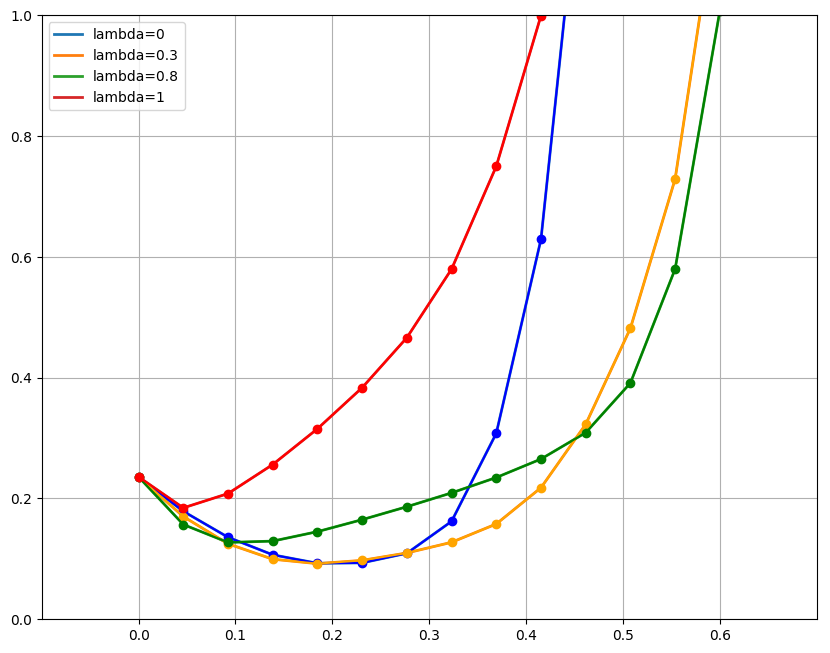

In [26]:
X = np.linspace(0, 0.6, 14)
# create a new figure of size 10 x 8 points using 100 dots per inch
plt.figure(figsize=(10,8), dpi=100)

# create a new subplot from a grid of 1x1
plt.subplot(111)

plt.plot(X, rms_lambdas[0], linewidth=2.0, label="lambda=0")
plt.plot(X, rms_lambdas[1], linewidth=2.0, label="lambda=0.3")
plt.plot(X, rms_lambdas[2], linewidth=2.0, label="lambda=0.8")
plt.plot(X, rms_lambdas[3], linewidth=2.0, label="lambda=1")
plt.plot(X, rms_lambdas[0], '-bo', color='blue')
plt.plot(X, rms_lambdas[1], '-bo', color='orange')
plt.plot(X, rms_lambdas[2], '-bo', color='green')
plt.plot(X, rms_lambdas[3], '-bo', color='red')

# set x limits
plt.xlim(-0.1, 0.7)

# set x ticks
plt.xticks(np.linspace(0,0.6,7))

# set y limits
plt.ylim(0, 1)

# set legend
plt.legend(loc='upper left')

# add grids
plt.grid()

